#Linear Regression From Scratch 

###Creating Linear Regression from scratch involves initializing parameters (weights and bias), using a hypothesis function (y^​=w⋅x+b), and optimizing these parameters to minimize a loss function,
###typically Mean Squared Error (MSE). This is achieved using gradient descent, which iteratively updates 
###the weights and bias based on the gradient of the loss function to each parameter. This process helps in
###understanding the underlying mechanics of Linear Regression and how predictions are refined through 
###optimization.

##Importing necessary libraries and dataset

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset=pd.read_csv(r'C:\Users\Huawei\Downloads\dataset.csv')
print(dataset.shape)
dataset.head()



(14, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


## Data Initialization

In [8]:
X = dataset['Head Size(cm^3)'].values
Y = dataset['Brain Weight(grams)'].values



### here I have used  .values  so that X and Y are taken as num py arrays, if they are taken as normal pandas series, there is wrong values in answer of mathemtical formulas used.

## Hypothesis Function

In [9]:
def hypothesis(X, b0, b1):
    return b0 + (b1*X)

### As mentioned in the question, hypothesis function to be used is y^​=w⋅x+b , here i have replaced 'w' which is weight with b1 and 'b' which is bias with b0.

## Normalize the Data

In [10]:
X = (X - np.mean(X)) / np.std(X)
Y = (Y - np.mean(Y)) / np.std(Y)

### Normalization of data is done because there is nan values in b0 and b1 if i do not normalize the data

## Gradient Descent

In [57]:
def gradient_descent(X, Y, b0, b1, learning_rate, iterations):
    n = len(X)
    for i in range(iterations):
        y_pred = hypothesis(X, b0, b1)
        db0 = np.sum(y_pred - Y) / n
        db1 = np.sum((y_pred - Y) * X) / n
        b0 = b0 - (learning_rate * db0)
        b1 = b1 - (learning_rate * db1)
    return b0, b1


## initialize parameters

In [58]:
b0 = 0
b1 = 0

## Train Model

In [62]:
learning_rate = 0.1
iterations = 10000
b0,b1=gradient_descent(X,Y,b0,b1, learning_rate, iterations)

print("b0 (bias) =", b0)
print("b1 (weight) =", b1)


b0 (bias) = -1.7763568394002525e-16
b1 (weight) = 0.7243353763614357


### My learnings from train model
### . best learning rate is used in training the model as it usually ranges from 0.01 to 0.1
### . setting iterations number larger will help improve model accuracy
### . As bias represents the value of Y when X is 0, so as bias is approx to zero, so it does not change the outcome
### . weight shows how much Y changes with X and its value =0.72 means that for every 1 unit increase in X, Y goes up by 0.72
### . So as X increases, Y increases so main impact in training the model is between X and Y, not the bias.


## Plot the Results

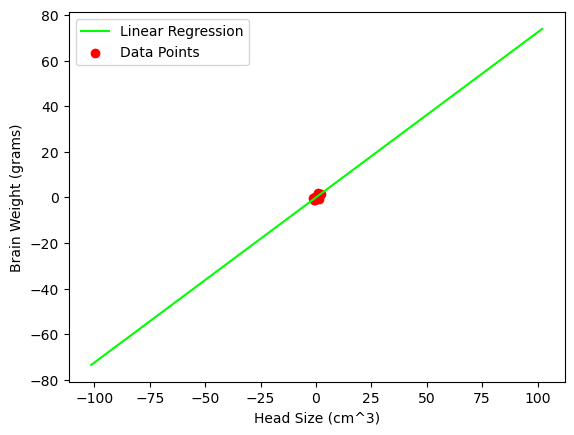

In [60]:

x_max = np.max(X) + 100
x_min = np.min(X) - 100
c = np.linspace(x_min, x_max, 1000)
d = hypothesis(c, b0, b1)

plt.plot(c, d, color='#00ff00', label='Linear Regression')
plt.scatter(X, Y, color='#ff0000', label='Data Points')
plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight (grams)')
plt.legend()
plt.show()

## Evaluate the model

In [61]:
def calculate_rmse(X, Y, b0, b1):
    y_pred = hypothesis(X, b0, b1)
    rmse = np.sqrt(np.sum((Y - y_pred) ** 2) / len(Y))
    return rmse

def calculate_r2(X, Y, b0, b1):
    y_pred = hypothesis(X, b0, b1)
    ss_total = np.sum((Y - np.mean(Y)) ** 2)
    ss_residual = np.sum((Y - y_pred) ** 2)
    r2_score = 1 - (ss_residual / ss_total)
    return r2_score

# Calculate RMSE
rmse = calculate_rmse(X, Y, b0, b1)
rmse_in_percentage = rmse * 100

print("RMSE in percentage: ",rmse_in_percentage)

# Calculate R² Score
r2_score = calculate_r2(X, Y, b0, b1)
r2_score_in_percentage = r2_score * 100

print("R^2 Score in percentage: ", r2_score_in_percentage)


RMSE in percentage:  68.94477953778201
R^2 Score in percentage:  52.46617374486635


### My learnings from Evaluation of model
### . Rmse and R^2 mathematical formulas are given in the blog, so here i have utilized these and calculate the values
### . Rmse(difference between predicted and actual value) value is High which means predictions through this model will not be accurate
### . R^2 value is average which means it explains almost half of the variance(i.e data points difference from average value) and has room for improvement